# Introduction to neural network cklassification with TensorFlow


In this notebook we're going to learn how to write neural network for classification problems

 A classification is where you try to classify something as one thing or another

A few types of classification problems:
1. binarry classification
2. multiclass classification
3. multilabel classification

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

#Create circle
X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42
                  )

In [2]:
# Check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check out the labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [4]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)


# Our data is little hard to understand right now... let's visualize it

In [5]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


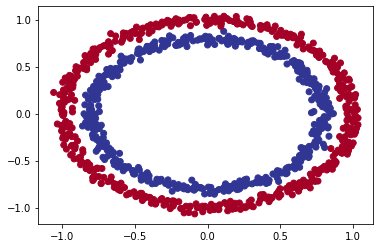

In [6]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu);

# Input and output shapes

In [7]:
# Check the shape of our feature and labels
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
# How many samples we're working
len(X), len(y)

(1000, 1000)

In [9]:
# View the first example of fetaure and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

# Steps in modelling

The steps in modelling with TensorFlow are typically:
1. Create or import the model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate...

In [10]:
# Import TensorFlow
import tensorflow as tf
tf.__version__

'2.5.0'

In [11]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"]
               )

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 1ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.4820


In [12]:
# Let's try and improve our model by training for longer ...
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we're working on binary classifcation problem and our model is getting around ~50% accuracy... it's performing as if it's guessing.

So let's step things up a notch and add an extra layer .

In [13]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model, this time with 2 layers
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"]
               )
# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [14]:
# 4. Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314204216003, 0.5]

In [15]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

# Improving the model

Let's look into our bag of tricks to see how we can improve our model
1. Create a model - we might to add more layers or increase the number of hidden units within a layer.
2. Compiling a model - here we might to choose a different optimization function such as Adam instead of SGD.
3. Fitting a model - perhaps we moght fit our model for more epochs (leave training it for longer)

In [16]:
# Set randor seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100), # add 100 dense neurons
    tf.keras.layers.Dense(10), # add another layer with 10 neurons
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"]
               )
# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [17]:
# Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.5080


[0.6980255246162415, 0.5080000162124634]

In [18]:
# Check prediction
model_3.predict(X)

array([[0.48793244],
       [0.558876  ],
       [0.56292844],
       [0.5705067 ],
       [0.44141144],
       [0.57388216],
       [0.5576486 ],
       [0.48246646],
       [0.4775583 ],
       [0.57502264],
       [0.514849  ],
       [0.530877  ],
       [0.56437737],
       [0.45787305],
       [0.45052725],
       [0.461299  ],
       [0.5405582 ],
       [0.4638092 ],
       [0.5479803 ],
       [0.50375676],
       [0.5063044 ],
       [0.58775455],
       [0.4590246 ],
       [0.49123323],
       [0.583216  ],
       [0.5704256 ],
       [0.55239356],
       [0.4631735 ],
       [0.45773405],
       [0.45440978],
       [0.47872233],
       [0.57856053],
       [0.5554615 ],
       [0.46339148],
       [0.45849162],
       [0.58986676],
       [0.5724737 ],
       [0.52974397],
       [0.45870548],
       [0.51092887],
       [0.49994153],
       [0.5463086 ],
       [0.51099026],
       [0.4579724 ],
       [0.5223273 ],
       [0.53888035],
       [0.44872284],
       [0.544

To visualize our models prediction, let's create a function 'plot_decission_boundary()', this funstion will:
1. Take in trained model, fetaure (X) and model (y)
2. Create a meshgrid of the different X values
3. Make prediction across meshgrid
4. Plot the predictions as well as a line between zones (where each unique class falls)

In [19]:
import numpy as np

def plot_decission_boundary(model, X, y):
    """
    Plots the decission boundary create by model predicting on X.
    This function isnpired by resources:
    1. https://cs231n.github.io/neural-networks-case-study/
    """
    # Define the axis of the plot and create the meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Create X value (we're going to make predictions on theese)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together
    
    # Make predictions
    y_pred = model.predict(x_in)
    
    # Check for multi-class
    if len(y_pred[0]) > 1:
        print("doing multiclass classification")
        # We have to reshape our prediction to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binnary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)
    
    # Plot the dexission boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

doing binnary classification


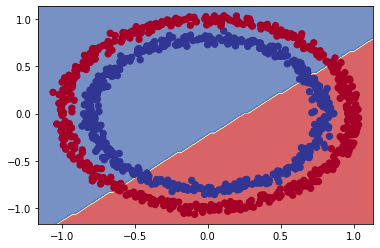

In [20]:
# Check out the prediction our model is making
plot_decission_boundary(model=model_3,
                        X=X,
                        y=y
                       )

In [24]:
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

x_min, x_max, y_min, y_max

(-1.1595024599098636,
 1.1337117525463374,
 -1.1677683182718437,
 1.1360036756154805)

In [25]:
# Let's see if our model can be used for a regression problem...
tf.random.set_seed(42)

# 1. Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X+100

# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model into regression data
#model_3.fit(X_reg_train, y_reg_train, epochs=100)

Oh wait.. we compiled our model for binnary classification problem.
But, we're working on regression problem, let's change the model suit our data

In [26]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]
               )

# 3. Fit the model
model_3.fit(X_reg_train, y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 1ms/step - loss: 248.2155 - mae: 248.2155
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 138.9005 - mae: 138.9005
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 53.1039 - mae: 53.1039
Epoch 4/100
5/5 [==============================] - 0s 1ms/step - loss: 73.5170 - mae: 73.5170
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 71.2358 - mae: 71.2358
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 47.0040 - mae: 47.0040
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 45.9386 - mae: 45.9386
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 42.3638 - mae: 42.3638
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 43.6831 - mae: 43.6831
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 42.6198 - mae: 42.6198
Epoch 11/100
5/5 [==============================] - 0s 

5/5 [==============================] - 0s 2ms/step - loss: 38.6614 - mae: 38.6614
Epoch 87/100
5/5 [==============================] - 0s 2ms/step - loss: 38.8399 - mae: 38.8399
Epoch 88/100
5/5 [==============================] - 0s 2ms/step - loss: 38.6604 - mae: 38.6604
Epoch 89/100
5/5 [==============================] - 0s 1ms/step - loss: 38.7559 - mae: 38.7559
Epoch 90/100
5/5 [==============================] - 0s 2ms/step - loss: 38.5442 - mae: 38.5442
Epoch 91/100
5/5 [==============================] - 0s 1ms/step - loss: 38.3247 - mae: 38.3247
Epoch 92/100
5/5 [==============================] - 0s 2ms/step - loss: 38.8431 - mae: 38.8431
Epoch 93/100
5/5 [==============================] - 0s 2ms/step - loss: 39.1137 - mae: 39.1137
Epoch 94/100
5/5 [==============================] - 0s 3ms/step - loss: 38.1463 - mae: 38.1463
Epoch 95/100
5/5 [==============================] - 0s 3ms/step - loss: 38.3998 - mae: 38.3998
Epoch 96/100
5/5 [==============================] - 0s 2ms/step

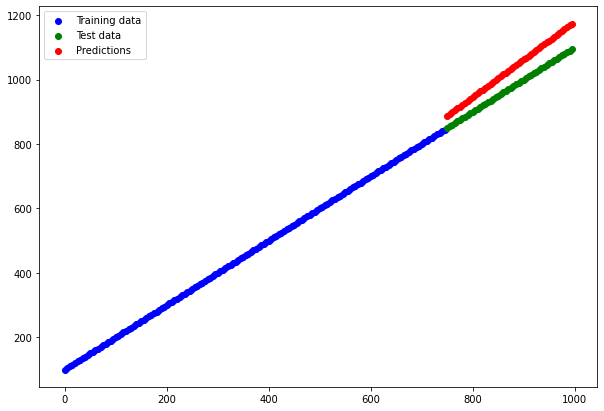

In [27]:
# Make prediction with our trained model
y_reg_preds = model_3.predict(X_reg_test)

# Plot the models prediction against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend();

# The missing piece: Non-linearity

In [28]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_4=tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# 2. Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"]
               )

# 3. Fit the model
model_4.fit(X, y, epochs=100)

C:\Users\Test-Laptop-2\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9642 - accuracy: 0.4180
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8626 - accuracy: 0.4100
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8123 - accuracy: 0.4160
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7802 - accuracy: 0.4170
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7419 - accuracy: 0.4220
Epoch 11/

32/32 [==============================] - 0s 2ms/step - loss: 0.7204 - accuracy: 0.4840
Epoch 84/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7193 - accuracy: 0.4840
Epoch 85/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7182 - accuracy: 0.4860
Epoch 86/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7173 - accuracy: 0.4880
Epoch 87/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7163 - accuracy: 0.4880
Epoch 88/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7154 - accuracy: 0.4880
Epoch 89/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7145 - accuracy: 0.4880
Epoch 90/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7136 - accuracy: 0.4880
Epoch 91/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7128 - accuracy: 0.4910
Epoch 92/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7120 - accuracy: 0.4900
Epoch 93/100


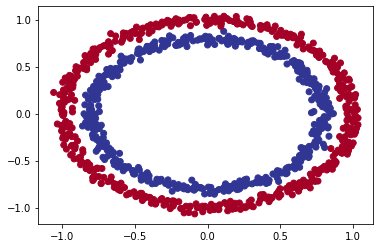

In [29]:
# Check our data
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu);

doing binnary classification


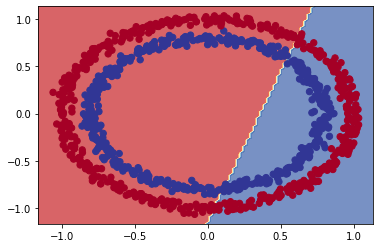

In [30]:
# Check the decission boundary for our latest model
plot_decission_boundary(model=model_4,
                        X=X,
                        y=y
                       )

Let's try build our first nural network with non-linear activation function.

In [31]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation
model_5=tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"]
)

# 3. Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9642 - accuracy: 0.4180
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8626 - accuracy: 0.4100
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8123 - accuracy: 0.4160
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7802 - accuracy: 0.4170
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7419 - accuracy: 0.4220
Epoch 11/

32/32 [==============================] - 0s 1ms/step - loss: 0.7214 - accuracy: 0.4830
Epoch 83/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7204 - accuracy: 0.4840
Epoch 84/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7193 - accuracy: 0.4840
Epoch 85/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7182 - accuracy: 0.4860
Epoch 86/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7173 - accuracy: 0.4880
Epoch 87/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7163 - accuracy: 0.4880
Epoch 88/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7154 - accuracy: 0.4880
Epoch 89/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7145 - accuracy: 0.4880
Epoch 90/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7136 - accuracy: 0.4880
Epoch 91/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7128 - accuracy: 0.4910
Epoch 92/100


In [32]:
# Time to replicate the multi-layer neural network from TensorFlow playground

# Set the random seed
tf. random.set_seed(42)

# 1. Create a model with a non-linear activation
model_6=tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"]
)

# 3. Fit the model
history = model_6.fit(X, y, epochs=250)

Epoch 1/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 83/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 84/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 85/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 86/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 87/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 88/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 89/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 90/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 91/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 92/250


Epoch 163/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 164/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 165/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 166/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 167/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 168/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 169/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 170/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 171/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 172/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accurac

32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 245/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 246/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 247/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 248/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 249/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 250/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000


In [33]:
# Evaluate the model
model_6.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

doing binnary classification


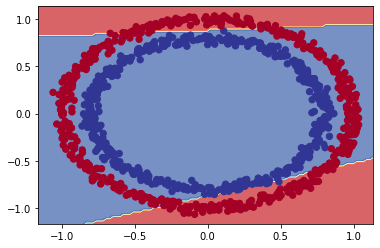

In [34]:
# How do our model prediction look ?
plot_decission_boundary(model_6, X, y)

In [35]:
# Set the random seed
tf. random.set_seed(42)

# 1. Create a model with a non-linear activation
model_7=tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"]
)

# 3. Fit the model
history = model_7.fit(X, y, epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 2ms/step - loss: 0.6891 - accuracy: 0.5020
Epoch 2/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6848 - accuracy: 0.5170
Epoch 3/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6824 - accuracy: 0.5160
Epoch 4/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6813 - accuracy: 0.5300
Epoch 5/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6802 - accuracy: 0.5390
Epoch 6/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6794 - accuracy: 0.5380
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6785 - accuracy: 0.5500
Epoch 8/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6778 - accuracy: 0.5480
Epoch 9/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6772 - accuracy: 0.5530
Epoch 10/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6766 - accuracy: 0.5510
Epoch 11/

32/32 [==============================] - 0s 1ms/step - loss: 0.4456 - accuracy: 0.9580
Epoch 83/250
32/32 [==============================] - 0s 1ms/step - loss: 0.4360 - accuracy: 0.9630
Epoch 84/250
32/32 [==============================] - 0s 997us/step - loss: 0.4260 - accuracy: 0.9690
Epoch 85/250
32/32 [==============================] - 0s 1ms/step - loss: 0.4145 - accuracy: 0.9700
Epoch 86/250
32/32 [==============================] - 0s 1ms/step - loss: 0.4059 - accuracy: 0.9740
Epoch 87/250
32/32 [==============================] - 0s 1ms/step - loss: 0.3962 - accuracy: 0.9750
Epoch 88/250
32/32 [==============================] - 0s 1ms/step - loss: 0.3873 - accuracy: 0.9720
Epoch 89/250
32/32 [==============================] - 0s 1ms/step - loss: 0.3795 - accuracy: 0.9750
Epoch 90/250
32/32 [==============================] - 0s 1ms/step - loss: 0.3716 - accuracy: 0.9750
Epoch 91/250
32/32 [==============================] - 0s 1ms/step - loss: 0.3635 - accuracy: 0.9840
Epoch 92/25

32/32 [==============================] - 0s 2ms/step - loss: 0.1046 - accuracy: 0.9940
Epoch 164/250
32/32 [==============================] - 0s 2ms/step - loss: 0.1031 - accuracy: 0.9930
Epoch 165/250
32/32 [==============================] - 0s 2ms/step - loss: 0.1027 - accuracy: 0.9890
Epoch 166/250
32/32 [==============================] - 0s 1ms/step - loss: 0.1010 - accuracy: 0.9930
Epoch 167/250
32/32 [==============================] - 0s 1ms/step - loss: 0.0996 - accuracy: 0.9930
Epoch 168/250
32/32 [==============================] - 0s 1ms/step - loss: 0.0986 - accuracy: 0.9920
Epoch 169/250
32/32 [==============================] - 0s 1ms/step - loss: 0.0970 - accuracy: 0.9930
Epoch 170/250
32/32 [==============================] - 0s 1ms/step - loss: 0.0959 - accuracy: 0.9920
Epoch 171/250
32/32 [==============================] - 0s 1ms/step - loss: 0.0949 - accuracy: 0.9920
Epoch 172/250
32/32 [==============================] - 0s 1ms/step - loss: 0.0937 - accuracy: 0.9920
Epoc

32/32 [==============================] - 0s 2ms/step - loss: 0.0492 - accuracy: 0.9920
Epoch 245/250
32/32 [==============================] - 0s 1ms/step - loss: 0.0487 - accuracy: 0.9940
Epoch 246/250
32/32 [==============================] - 0s 1ms/step - loss: 0.0483 - accuracy: 0.9930
Epoch 247/250
32/32 [==============================] - 0s 1ms/step - loss: 0.0479 - accuracy: 0.9950
Epoch 248/250
32/32 [==============================] - 0s 1ms/step - loss: 0.0475 - accuracy: 0.9930
Epoch 249/250
32/32 [==============================] - 0s 1ms/step - loss: 0.0471 - accuracy: 0.9950
Epoch 250/250
32/32 [==============================] - 0s 1ms/step - loss: 0.0471 - accuracy: 0.9940


In [36]:
# Evaluate the model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0459 - accuracy: 0.9920


[0.04593364894390106, 0.9919999837875366]

doing binnary classification


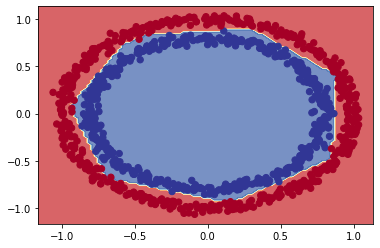

In [37]:
# Lets visualize our incredible metrics
plot_decission_boundary(model_7, X, y)

** Note ** The combination of 'linear (straight lines) and non-linear (non-straighr lines) function' in one of the key fundamentals of neural network.

Now we've discussed the concept of linera and non-linear function (or lines), let see them action. 

In [38]:
# Create a toy a tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

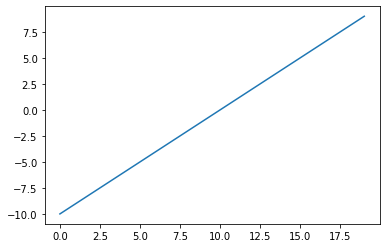

In [39]:
# Visualize the tensor
plt.plot(A)

In [40]:
# Lets start by replicating sigmoid - sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
    return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

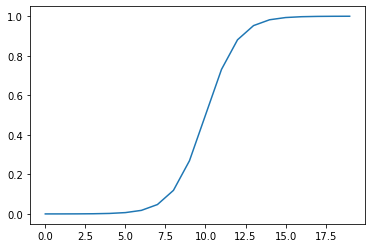

In [41]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A))

In [42]:
# Lets create the relu function
def relu(x):
    return tf.maximum(0, x)

# Pass our toy tensor to out custom relu funtion
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

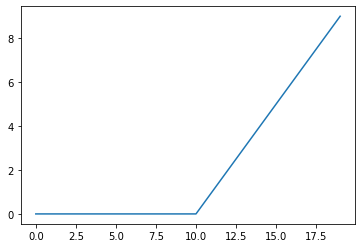

In [43]:
# Plot ReLU-modified tensor
plt.plot(relu(A));

In [44]:
# Lets try the linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

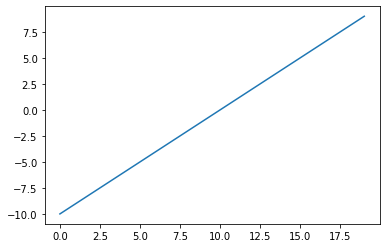

In [45]:
# Does the linear activation function change anything ?
plt.plot(tf.keras.activations.linear(A))

In [46]:
# Does A even change ?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

# Evaluating and improving our classification

So far we've been training and testing on the same dataset...
However, in machine learning this is basically a sin.
So lets create a training and dataset

In [47]:
# Check how many sample we have
len(X)

1000

In [48]:
# Split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [49]:
# Lets create a model to fit on the training data and evaluate on the testing data

# Set the random seed
tf. random.set_seed(42)

# 1. Create a model (same as model_7)
model_8=tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["accuracy"]
)

# 3. Fit the model
history = model_8.fit(X, y, epochs=25)

C:\Users\Test-Laptop-2\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/25
32/32 [==============================] - 1s 2ms/step - loss: 0.6834 - accuracy: 0.5550
Epoch 2/25
32/32 [==============================] - 0s 2ms/step - loss: 0.6761 - accuracy: 0.5630
Epoch 3/25
32/32 [==============================] - 0s 2ms/step - loss: 0.6700 - accuracy: 0.5600: 0s - loss: 0.6701 - accuracy: 0.55
Epoch 4/25
32/32 [==============================] - 0s 2ms/step - loss: 0.6615 - accuracy: 0.5960
Epoch 5/25
32/32 [==============================] - 0s 2ms/step - loss: 0.6553 - accuracy: 0.5850
Epoch 6/25
32/32 [==============================] - 0s 2ms/step - loss: 0.6386 - accuracy: 0.6360
Epoch 7/25
32/32 [==============================] - 0s 2ms/step - loss: 0.6150 - accuracy: 0.6890
Epoch 8/25
32/32 [==============================] - 0s 2ms/step - loss: 0.5641 - accuracy: 0.7480
Epoch 9/25
32/32 [==============================] - 0s 2ms/step - loss: 0.5101 - accuracy: 0.8090
Epoch 10/25
32/32 [==============================] - 0s 2ms/step - loss: 0.4451 - 

In [50]:
# 4. Evaluate the model dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.0963 - accuracy: 0.9900


[0.09631655365228653, 0.9900000095367432]

doing binnary classification
doing binnary classification


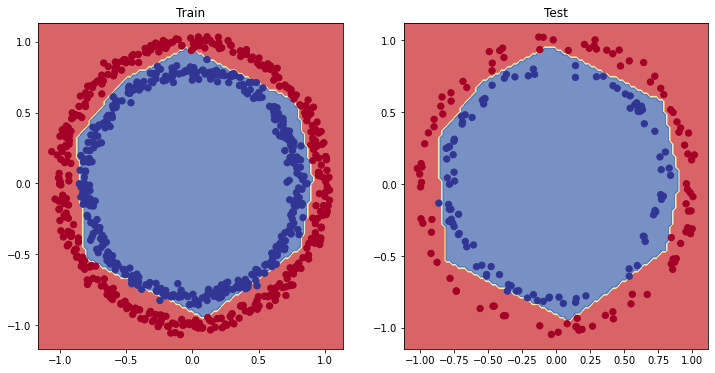

In [51]:
# Plot the decission boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decission_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decission_boundary(model_8, X=X_test, y=y_test)
plt.show();

# Plot the loss (or training) curves

In [52]:
# Convert the history object into a DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.683428,0.555
1,0.676111,0.563
2,0.669990,0.560
3,0.661518,0.596
4,0.655262,0.585
5,0.638609,0.636
6,0.614991,0.689
7,0.564100,0.748
8,0.510077,0.809
9,0.445113,0.855


Text(0.5, 1.0, 'model_8 loss curves')

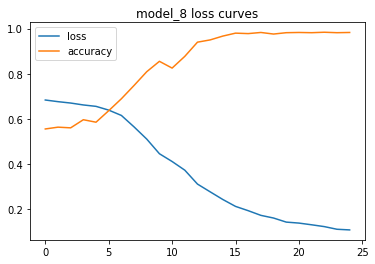

In [53]:
# Plot the loss curve
pd.DataFrame(history.history).plot()
plt.title("model_8 loss curves")

**Note :** for many problems, the loss function going down, means the model is improving(the prediction it's making are getting closer to the ground truth labels).

# Finding the best learning

To find te ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:
1. A learning rate **callback** - you can think of a callback as an extra piece of functionality, you can add to your *while* its training.
2. Another model (we could use the same one as above, but we'are practicing building model here)
3. A modified loss curve plot

In [54]:
# Set the random seed
tf. random.set_seed(42)

# 1. Create a model (same as model_7)
model_9=tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_9.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["accuracy"]
)

# 3. Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# 4. Fit the model
history_9 = model_9.fit(X_train,
                        y_train,
                        epochs=100,
                        callbacks=[lr_scheduler]
                       )

C:\Users\Test-Laptop-2\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6945 - accuracy: 0.4988
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4975
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.4963
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.4975
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5063
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.5013
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.4950
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6889 - accuracy: 0.5038
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6880 - accuracy: 0.5013
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6871 - accuracy: 0.5050
Epoch 11/

25/25 [==============================] - 0s 997us/step - loss: 0.6685 - accuracy: 0.7088
Epoch 83/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7621 - accuracy: 0.4963
Epoch 84/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7024 - accuracy: 0.4988
Epoch 85/100
25/25 [==============================] - 0s 914us/step - loss: 0.7290 - accuracy: 0.5038
Epoch 86/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7749 - accuracy: 0.5038
Epoch 87/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7674 - accuracy: 0.5063
Epoch 88/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7572 - accuracy: 0.5163
Epoch 89/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7571 - accuracy: 0.4963
Epoch 90/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7829 - accuracy: 0.5238
Epoch 91/100
25/25 [==============================] - 0s 2ms/step - loss: 0.8095 - accuracy: 0.5213
Epoch 92/

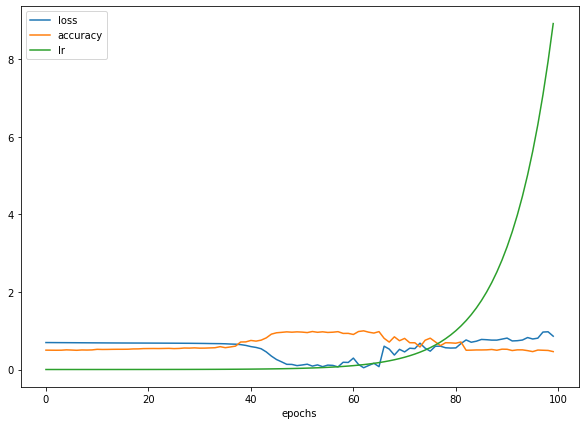

In [55]:
# Checkout the history
pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel="epochs");

Text(0.5, 1.0, 'Lerning rate vs. Loss')

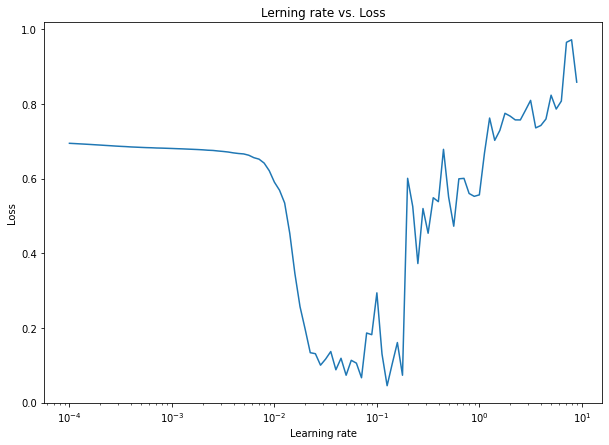

In [56]:
# Plot the lerning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Lerning rate vs. Loss")

In [57]:
# Example of other typical learning rates values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [58]:
# Lets try using higher *ideal* learning rate with the same model as before

In [59]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model (same as model_7)
model_10=tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.02),
                metrics=["accuracy"]
)

# 3, Fit the model for 20 epochs (5 less the before)
history_10 = model_10.fit(X_train, y_train, epochs=20)

C:\Users\Test-Laptop-2\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/20
25/25 [==============================] - 1s 1ms/step - loss: 0.6837 - accuracy: 0.5600
Epoch 2/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6744 - accuracy: 0.5750
Epoch 3/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6626 - accuracy: 0.5875
Epoch 4/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6332 - accuracy: 0.6388
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5830 - accuracy: 0.7563
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4907 - accuracy: 0.8313
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4251 - accuracy: 0.8450
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3596 - accuracy: 0.8875
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3152 - accuracy: 0.9100
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2512 - accuracy: 0.9500
Epoch 11/20
25/25 [

In [60]:
# Evaluate model 10 on the test data
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9900


[0.057401832193136215, 0.9900000095367432]

In [61]:
#evaluate model 8 on the test data
model_8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.0963 - accuracy: 0.9900


[0.09631655365228653, 0.9900000095367432]

doing binnary classification
doing binnary classification


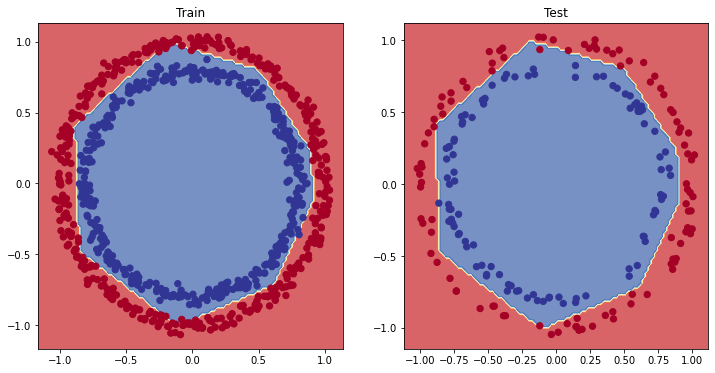

In [62]:
# Plot the decission boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decission_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decission_boundary(model_10, X=X_test, y=y_test)
plt.show()

# More classification evaluation methods

Alongside visualizing our model result as much as possible, there are handful of other classification evaluation methods & metrics you should be familiar with :
1. Accuracy
2. Precission
3. Recall
4. F1-score
5. Confusion matrix
6. Classification report (from scikit-learn) https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [63]:
# Check the accuracy model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 1ms/step - loss: 0.0574 - accuracy: 0.9900
Model loss on the test set: 0.057401832193136215
model accuracy on the test set: 99.00%


How about confusion matrix ?

In [64]:
from sklearn.metrics import confusion_matrix
# Make a prediction
y_preds = model_10.predict(X_test)


In [65]:
# Convert prediction probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [66]:
# Create confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[99,  2],
       [ 0, 99]], dtype=int64)

How about we prettify our confusion matrix

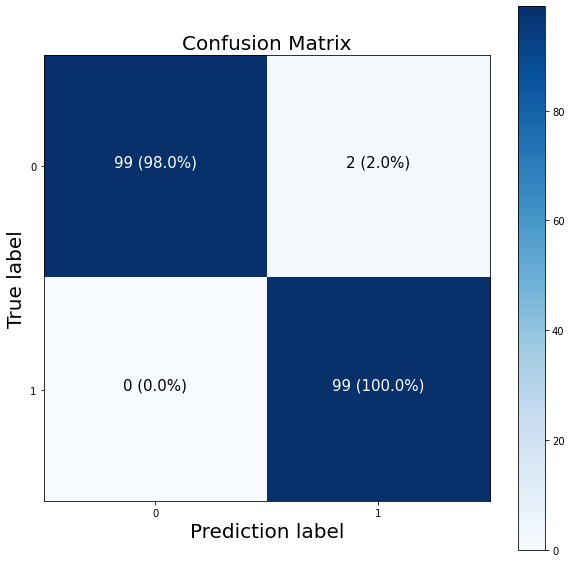

In [92]:
# Note : The confusion matrix code we're about to write is a remix of scikit-learn plot_confusion_matrix
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

import itertools

figsize = (10, 10)

# Create confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # Normalize our confusion matrix
n_classes=cm.shape[0]

# Lets prettify it
fig, ax = plt.subplots(figsize=figsize)

# Create matrix plot
cax=ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

#Create classes
classes = False

if classes:
    labels=classes
else:
    labels=np.arange(cm.shape[0])
    
# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Prediction label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels
      )

# Set x-axis labels bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set the threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=15
            )

# Working with a larger example(multiclass classification)

When you have more than two classes as an option, it's known as multi-class-classification
1. This means if you have 3 different classes, its multi-class-classification
2. It also if you have 100 different classes, it's multi-class-classification

To practice multi-class classification, we're going to build a nural network to classify image of different items of clothing.

In [97]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [99]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training labels:\n{train_labels[0]}\n")

# https://github.com/zalandoresearch/fashion-mnist

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [100]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

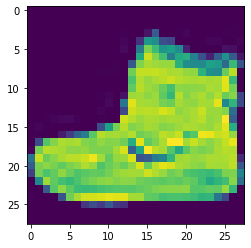

In [101]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0])

In [103]:
# Check out the sample label
train_labels[7]

2

In [107]:
# Cretae a small list so we can index on to our training labels so they're human readable
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
len(class_names)

10

Text(0.5, 1.0, 'Trouser')

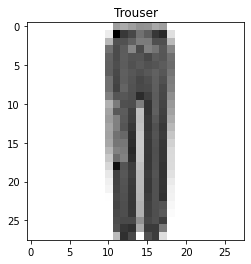

In [113]:
# Plot an example image and its label
index_of_choice = 1000
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

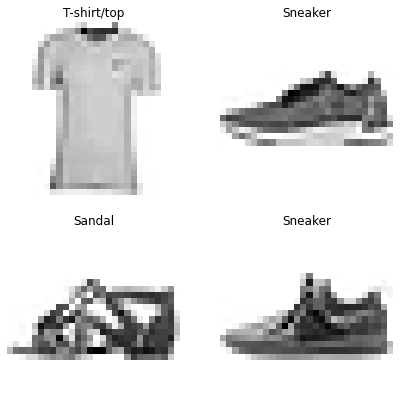

In [114]:
# Plot multiple random images of fashion mnist

import random

plt.figure(figsize=(7, 7))
for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

# Building a multi-class classification model

for our multi-class clssification model, we can use a similar architecture to our binary classifiers, however, we're going to have to tweak a few things:
1. Input shape = 28x28 (the shape of one image)
2. Output shape = 10 (one per class of clothing)
3. Loss function = tf.keras.losses.Categorycrossentropy
4. If your labels are noe-hot encoded, use CateoricalCrossentropy
5. If your labels is integer form (not one-hot encoded), use SparseCategoricalCrossentropy
4. Output layer activation = Softmax (not sigmoid)

In [118]:
# Our data need to be flattened (from 28*28 to none, 784)
flatten_model=tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28))])
flatten_model.output_shape

(None, 784)

In [121]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_11=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# 2. Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.02),
                metrics=["accuracy"]
)

# 3, Fit the model for 20 epochs (5 less the before)
non_norm_history = model_11.fit(train_data, 
                                train_labels, 
                                epochs=10, 
                                validation_data=(test_data, test_labels)
                               )

C:\Users\Test-Laptop-2\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3454 - accuracy: 0.1006 - val_loss: 2.3061 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3054 - accuracy: 0.0989 - val_loss: 2.3069 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3055 - accuracy: 0.1000 - val_loss: 2.3050 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3053 - accuracy: 0.1008 - val_loss: 2.3058 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3052 - accuracy: 0.0994 - val_loss: 2.3034 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3050 - accuracy: 0.1003 - val_loss: 2.3043 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3053 - accuracy: 0.0996 - val_loss: 2.3043 - val_accuracy:

# Using one-hot encoded

In [122]:
# Using one hot and non SparseCategoricalCrossentropy
tf.one_hot(train_labels[:10], depth=10)

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)>

In [139]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_11=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# 2. Compile the model not using learning rate
model_11.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"]
)

# 3, Fit the model for 20 epochs (5 less the before)
non_norm_history = model_11.fit(train_data, 
                                tf.one_hot(train_labels, depth=10), 
                                epochs=10, 
                                validation_data=(test_data, tf.one_hot(test_labels, depth=10))
                               )

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1608 - accuracy: 0.1639 - val_loss: 1.7971 - val_accuracy: 0.2073
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7081 - accuracy: 0.2487 - val_loss: 1.6460 - val_accuracy: 0.2800
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6278 - accuracy: 0.2824 - val_loss: 1.6023 - val_accuracy: 0.2910
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6092 - accuracy: 0.2827 - val_loss: 1.5968 - val_accuracy: 0.2888
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5956 - accuracy: 0.2927 - val_loss: 1.5808 - val_accuracy: 0.3039
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5921 - accuracy: 0.3008 - val_loss: 1.5695 - val_accuracy: 0.3060
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5806 - accuracy: 0.3111 - val_loss: 1.5695 - val_accuracy:

In [125]:
# Check model summary
model_11.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_33 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_34 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [126]:
# Check the min and max values of the data training
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled (or normalized), this means they like to have the numbers in the tensors they try to find pattern between 0 and 1 

In [131]:
# We can get our training and testing data between 0 & 1 by dividing by the maximum
train_data_norm = train_data/255
test_data_norm = test_data/255

# Check the min and max values of the scaled training data and test data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [137]:
# Now our data is nrmalized, lets build a model to find patterns in it

# Set random seed
tf.random.set_seed(42)

# 1. Create a model (same as model_11)
model_12=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# 2. Compile the model not using learning rate
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"]
)

# 3, Fit the model for 20 epochs (5 less the before)
norm_history = model_12.fit(train_data_norm, 
                                train_labels, 
                                epochs=10, 
                                validation_data=(test_data_norm, test_labels)
                               )

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

**Note :** Neural network tend to prefer data in numerical form as well as scalled/normalized (numbers between 0 & 1)

# Plot the comparison data

<AxesSubplot:title={'center':'Normalized data'}>

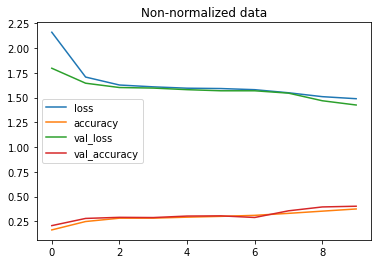

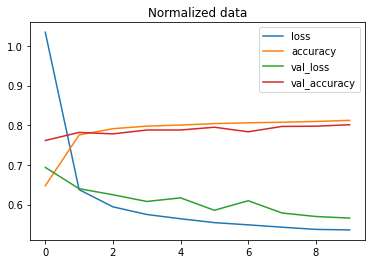

In [140]:
import pandas as pd

# Plot non-normalized data loss curve
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")
# Plot normalized data loss curve
pd.DataFrame(norm_history.history).plot(title="Normalized data")

**Note :** The same model with even slightly different data can produce dramatically different results. So when you're comparing models, it's importan to make sure yo're comparing them on same criteria(e.g. same architecture but different data or sama data but different architecture)

# Finding the ideal learning rate

In [143]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model (same as model_11)
model_13=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# 2. Compile the model not using learning rate
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"]
)

# 3. Create the leaning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-3 * 10**(epoch/20))

# 4. Fit the model for 20 epochs (5 less the before)
find_lr_history = model_13.fit(train_data_norm, 
                               train_labels, 
                               epochs=40, 
                               validation_data=(test_data_norm, test_labels),
                               callbacks=[lr_scheduler]
                               )

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770
Epoch 4/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940
Epoch 7/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5542 - accuracy: 0.8036 - val_loss: 0.5898 - val_accuracy:

Text(0.5, 1.0, 'Finding the ideal learning rate')

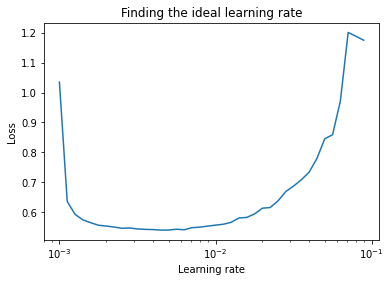

In [145]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [146]:
# Lets refit a model with the ideal learning rate

# Set random seed
tf.random.set_seed(42)

# 1. Create a model (same as model_11)
model_14=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# 2. Compile the model not using learning rate
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"]
)

# 3. Fit the model for 20 epochs (5 less the before)
history_14 = model_14.fit(train_data_norm, 
                               train_labels, 
                               epochs=20, 
                               validation_data=(test_data_norm, test_labels)
                               )

C:\Users\Test-Laptop-2\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

# Evaluating our multi-class classification model

To evaluate our multi-class classification model we could:
1. Evaluate its performance using other classification metrics (such as a confusion matrix)
2. Assess some of predictions (through visualization)
3. improve its result (by trining it for longer or changing the architecture)
4. Save and export it for use in an application

Lets go through the top 2....

In [147]:
# Create the confusion matrix

import itertools

from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
    # Create confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # Normalize our confusion matrix
    n_classes=cm.shape[0]
    # Lets prettify it
    fig, ax = plt.subplots(figsize=figsize)
    # Create matrix plot
    cax=ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)
    
    # Set labels to be classes
    if classes:
        labels=classes
    else:
        labels=np.arange(cm.shape[0])

    # Label the axes
    ax.set(title="Confusion Matrix",
           xlabel="Prediction label",
           ylabel="True label",
           xticks=np.arange(n_classes),
           yticks=np.arange(n_classes),
           xticklabels=labels,
           yticklabels=labels
          )

    # Set x-axis labels bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Adjust label size
    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

    # Set the threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
                 horizontalalignment="center",
                 color="white" if cm[i, j] > threshold else "black",
                 size=15
                )


In [150]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [151]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [156]:
# Make some predictions with our model
y_probs = model_14.predict(test_data_norm) # probs is short for predictions probabilities

# View the 5 predictions
y_probs[:5]

array([[8.5629982e-11, 3.5361769e-13, 2.6633732e-05, 4.6356295e-08,
        5.0949817e-05, 9.6118927e-02, 8.1778047e-08, 9.1869034e-02,
        4.0605087e-03, 8.0787373e-01],
       [3.4278621e-06, 1.2899216e-16, 9.5989150e-01, 2.0516354e-07,
        1.5329231e-02, 2.4532478e-13, 2.4142873e-02, 1.1383274e-28,
        6.3272589e-04, 4.4789129e-08],
       [6.1062710e-05, 9.9657673e-01, 4.3866475e-08, 3.3405658e-03,
        1.3249347e-05, 1.4383106e-21, 8.2789820e-06, 7.3236338e-18,
        5.4810872e-08, 4.9224388e-14],
       [7.5031574e-05, 9.9053687e-01, 4.2528450e-07, 9.2231557e-03,
        1.3623078e-04, 1.8276090e-18, 2.6808242e-05, 4.8123635e-14,
        1.4521424e-06, 2.2211207e-11],
       [7.2189875e-02, 1.5495756e-06, 2.5566894e-01, 1.0363093e-02,
        4.3541376e-02, 1.1069410e-13, 6.1693031e-01, 6.7543142e-23,
        1.3049159e-03, 1.2140315e-09]], dtype=float32)

**Note:** Rememer to make prediction on the same kind of data your model was trained on (e.g. if your model was trained on normalized data, you'll want to make prediction on normalized data).

In [157]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [158]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([8.5629982e-11, 3.5361769e-13, 2.6633732e-05, 4.6356295e-08,
        5.0949817e-05, 9.6118927e-02, 8.1778047e-08, 9.1869034e-02,
        4.0605087e-03, 8.0787373e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [159]:
# Convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=int64)

In [161]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[696,   8,  25,  87,   9,   5, 160,   0,  10,   0],
       [  2, 939,   2,  35,   9,   0,  13,   0,   0,   0],
       [ 19,   2, 656,  10, 188,   0, 110,   0,  15,   0],
       [ 39,  10,  10, 819,  55,   0,  47,   1,  19,   0],
       [  0,   0,  95,  23, 800,   0,  73,   0,   7,   2],
       [  0,   0,   1,   0,   0, 894,   0,  60,   7,  38],
       [106,   4, 158,  57, 159,   1, 499,   0,  16,   0],
       [  0,   0,   0,   0,   0,  31,   0, 936,   0,  33],
       [  4,   1,  38,  15,   8,  12,   9,   5, 906,   2],
       [  0,   0,   1,   0,   2,  15,   0,  51,   1, 930]], dtype=int64)

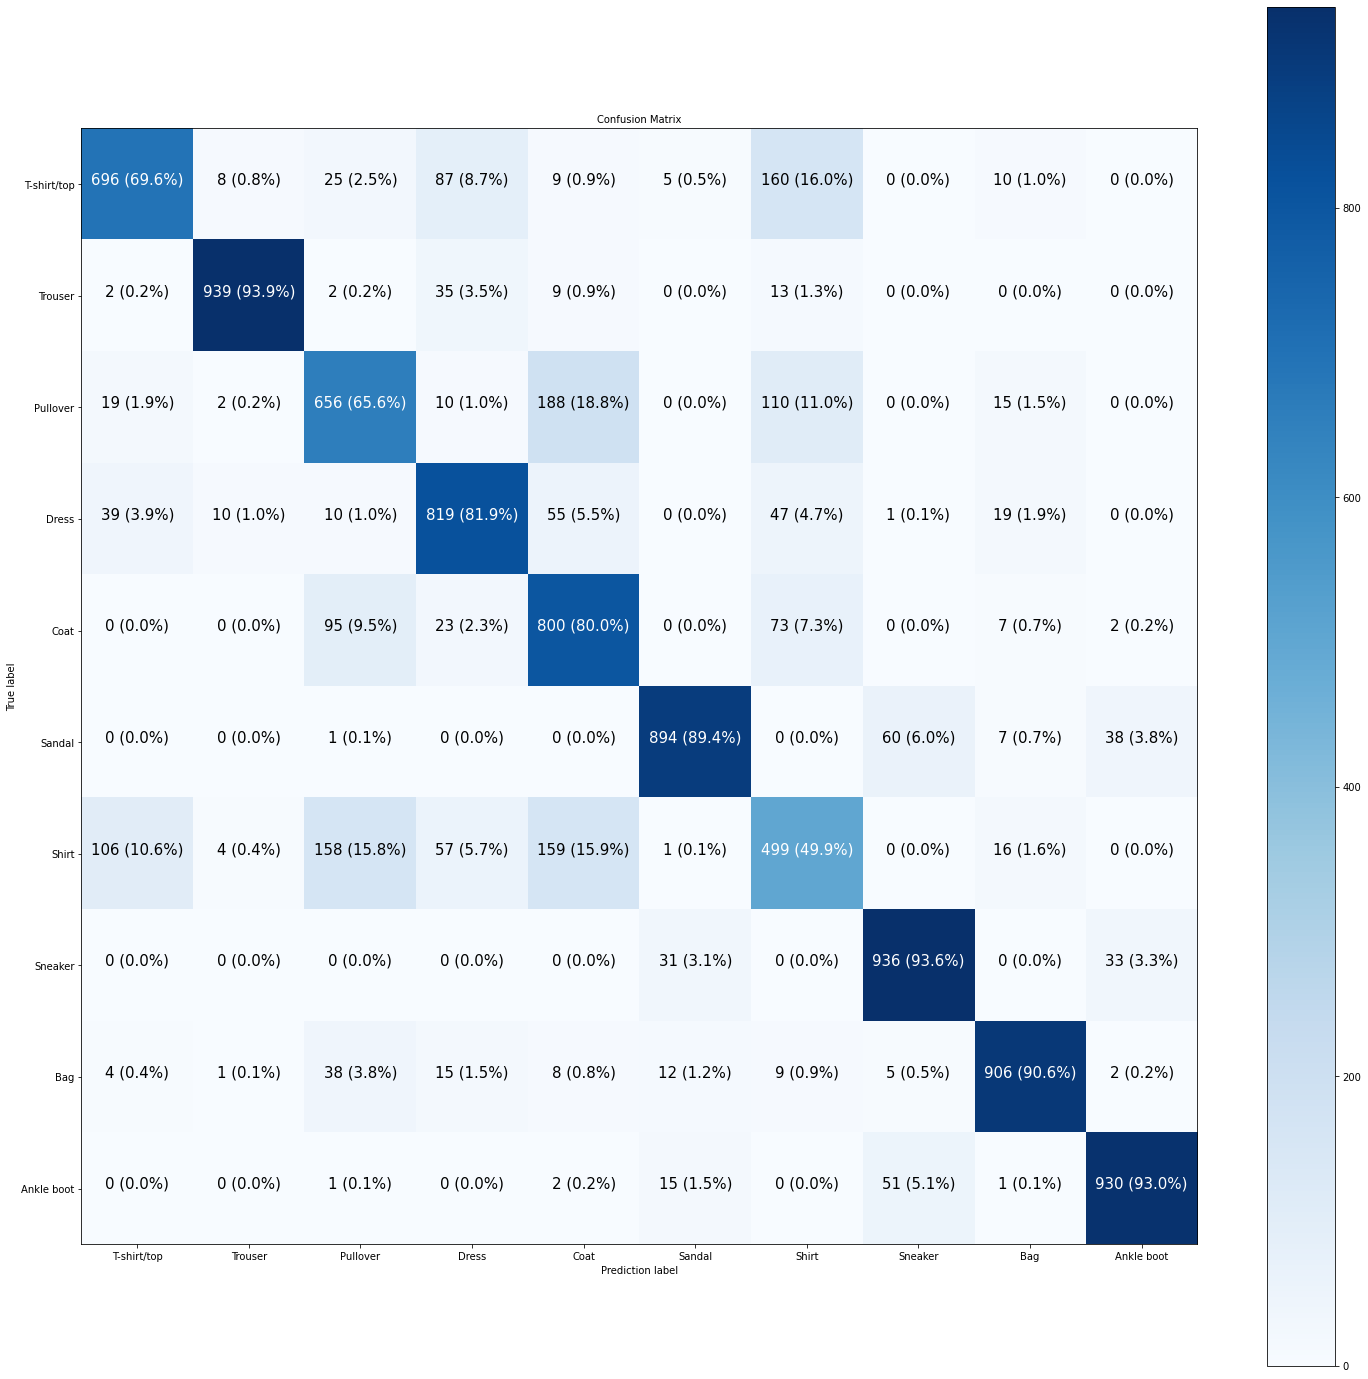

In [164]:
# Make a prettier confusionmatrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(25, 25),
                      text_size=(10)
                     )

**Note:** Often when working with images and other forms of visual data, its a good idea to visualize as much as possible to develop a further understanding of the data and the inputs and outputs of your models

How about we create a fun little function for:
* Plot a random image
* Make a prediction on said image
* Label the plot with the truth label & the predicted label

In [176]:
import random

def plot_random_image(model, images, true_labels, classes):
    """
    Picks a random image, plots it and labels it with a prediction and truth label
    """
    # Set up random integer 
    i = random.randint(0, len(images))
    
    # Create prediction and targets
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1, 28, 28))
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]
    
    # Plot the image
    plt.imshow(target_image, cmap=plt.cm.binary)
    
    # Change the color of the titles depending on if the preictions is right or wrong.
    if pred_label == true_label:
        color = "green"
    else:
        color = "red"
    
    # Add xlabel information (prediction/true label)
    plt.xlabel("Pred: {} {:2.0f}% (True: {})". format(pred_label,
                                                      100*tf.reduce_max(pred_probs),
                                                      true_label), 
               color=color) # Set the color green or red based on if prediction is right or wrong.

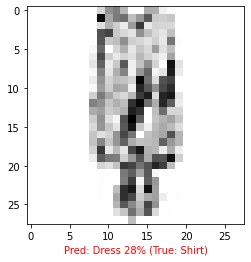

In [192]:
# Check out a random image as well as its prediction
plot_random_image(model=model_14,
                  images=test_data_norm, # always make prediction on the same kind of data your model was trained on
                  true_labels=test_labels,
                  classes=class_names
                 )

# What pattern is our model learning ?

In [193]:
# Find the layers of our most recent model 
model_14.layers

In [194]:
# Extract a particular layer
model_14.layers[1]

In [195]:
# Get the pattern of the layer in our network
weights, biases = model_14.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[ 0.7150266 , -0.06077086, -0.9976308 , -1.0484312 ],
        [ 0.27732116, -0.47155362, -0.5291646 ,  0.02329238],
        [ 0.7752429 ,  0.54027545, -1.1288568 , -0.74261546],
        ...,
        [-0.39453447,  0.47628677, -0.22641525,  0.25505912],
        [-0.40515828,  0.61810106,  0.23928423, -0.5038759 ],
        [ 0.23884551,  0.11606929, -0.12131333,  0.04352404]],
       dtype=float32),
 (784, 4))

In [196]:
model_14.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_56 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_57 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_58 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


Now lets check out the bias vector ...

In [197]:
# Bias and biases shape
biases, biases.shape

(array([ 2.4486070e-02, -6.1512832e-04, -2.7230212e-01,  8.1124848e-01],
       dtype=float32),
 (4,))

Every neuron has a bias vector. Each of these is paired with a weights matrix

The bias vector get initialized as zeros (at least in the case of a TensorFlow Dense layer)

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

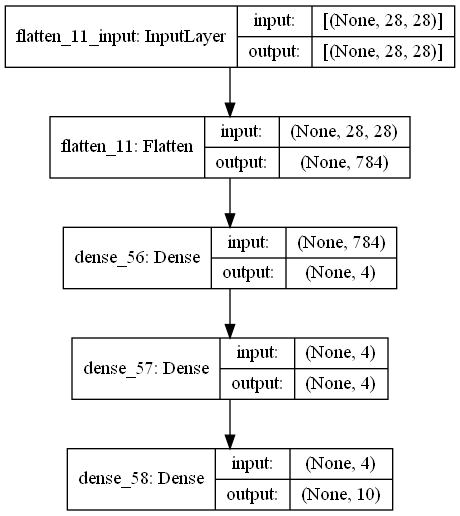

In [199]:
# Lets check out another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model
# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)